In [5]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import pip
import altair as alt
# pip.main(["install", "openpyxl"])
%matplotlib inline

In [6]:
df_log2298 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2298.xlsx')
df_log2320 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2320.xlsx')
df_log2326 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2326.xlsx')
df_log2331 = pd.read_excel(r'~/SCALOS/project/runlogs/Autosort Run Log 2331.xlsx')
df_data2298 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2298.csv')
df_data2320 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2320.csv')
df_data2326 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2326.csv')
df_data2331 = pd.read_csv(r'~/SCALOS/project/data/finaldata_uw2331.csv')

In [9]:
class DataPrep:

    def runlog_cleanup(df_log2298, df_log2320, df_log2326, df_log2331):
        
        # clean up uw2298
        del df_log2298["Riley's Stress Level"]                                    # delete unncessary column 
        df_log2298.rename(columns = {'FLAP L/R':'IB FLAP L/R'}, inplace = True)   # Rename inconsistant column
        df_log2298.rename(columns = {'AIL L/R':'OB AIL L/R'}, inplace = True)     # Rename inconsistant column
        df_log2298.rename(columns = {'LE DEF':'LE IB/OB'}, inplace = True)        # Rename inconsistant column
        df_log2298.rename(columns = {'TRIP DEF':'TRIP DOTS'}, inplace = True)     # Rename inconsistant column
        df_log2298.insert(1,'TEST', 2298)                                         # add entry number 
        df_log2298['Nacelle Blockage L/R']= np.nan
        df_log2298['Spoiler L/R']= np.nan
        temp = df_log2298['DATE']
        del df_log2298['DATE']
        df_log2298['DATE']= temp
        df_log2298.columns.tolist() 
        # clean up uw2320
        df_log2320.rename(columns = {'FLAP L/R':'IB FLAP L/R'}, inplace = True)
        df_log2320.rename(columns = {'AIL L/R':'OB AIL L/R'}, inplace = True)
        df_log2320.rename(columns = {'TRIP DEF':'TRIP DOTS'}, inplace = True)
        df_log2320.insert(1,'TEST', 2320)
        df_log2320['Nacelle Blockage L/R']= np.nan
        df_log2320['Spoiler L/R']= np.nan
        temp = df_log2320['DATE']
        del df_log2320['DATE']
        df_log2320['DATE']= temp
        # clean up uw2326
        df_log2326.insert(1,'TEST', 2326)
        df_log2326['Nacelle Blockage L/R']= np.nan
        df_log2326['Spoiler L/R']= np.nan
        temp = df_log2326['DATE']
        del df_log2326['DATE']
        df_log2326['DATE']= temp
        # clean up uw2331 
        df_log2331.insert(1,'TEST', 2331)
        # column title are consistant 
        if df_log2298.columns.tolist() !=  df_log2320.columns.tolist():
            raise ValueError("Either 2298 or 2320 data is not right!") 

        if df_log2298.columns.tolist() !=  df_log2326.columns.tolist():
            raise ValueError("Either 2298 or 2326 data is not right!")

        if df_log2298.columns.tolist() !=  df_log2331.columns.tolist():
            raise ValueError("Either 2298 or 2331 data is not right!")

        # Concatinate all run logs into single data frame
        df_log = pd.concat([df_log2298, df_log2320, df_log2326, df_log2331], ignore_index=True,axis=0)

        return df_log, df_log2298, df_log2320, df_log2326, df_log2331
    
    def data_cleanup(df_data2298, df_data2320, df_data2326, df_data2331):
        if df_data2298.columns.tolist() !=  df_data2320.columns.tolist():
            raise ValueError("Either 2298 or 2320 data is not right!")

        if df_data2298.columns.tolist() !=  df_data2326.columns.tolist():
            raise ValueError("Either 2298 or 2326 data is not right!")

        if df_data2298.columns.tolist() !=  df_data2331.columns.tolist():
            raise ValueError("Either 2298 or 2331 data is not right!")

        df_data = pd.concat([df_data2298, df_data2320, df_data2326, df_data2331], ignore_index=True,axis=0)
        return df_data

In [10]:
df_log2298.head()

,RUN NO.,WT.\nTARE\nRUN,CONFIGURATION,TYPE OF RUN,a,Y,qnom,FLAP L/R,AIL L/R,STAB,RUD,CAN,LE DEF,TRIP DEF,Riley's Stress Level,DATE
0,NaN,NaN,NaN,NaN,DEG,DEG,PSF,DEG,DEG,DEG,DEG,DEG,TYPE,TYPE,1-10,2020
1,1.0,NaN,F15+A20+W20+N20.T+V20+H20.T+C15.F(FairingCap4.6),WT TARE,-11/32,-13/13,NaN,0/0,0,0,0,0,Cruise,FTDEX,4,2020-09-04 00:00:00
2,2.0,1.0,F15+A20+W20+N20.T+V20+H20.T+C15.F(FairingCap4.6),P6,A1,0,40,0/0,0,0,0,0,Cruise,FTDEX,9,2020-09-04 00:00:00
3,3.0,1.0,F15+A20+W20+N20.T+V20+H20.T+C15.F(FairingCap4.6),Y6,0,B3,40,0/0,0,0,0,0,Cruise,FTDEX,2,2020-09-04 00:00:00
4,4.0,1.0,F15+A20+W20+N20.T+V20+H20.T+C15.F(FairingCap4.5),P6,A1,0,40,0/0,0,0,0,0,Cruise,FTDEX,3,2020-09-04 00:00:00


In [17]:
# alt.Chart(df_data2298').mark_line().encode(
#     x='Date:T',
#     y='qnom:n',
#     color=''
# )

SyntaxError: EOL while scanning string literal (3822052520.py, line 1)

In [11]:
df_data = DataPrep.data_cleanup(df_data2298, df_data2320, df_data2326, df_data2331)

In [35]:
df = df_data_sub
df

,RUN,TEST,TP,ALPHAC,BETA,PSI,QC,RE_MAC,TEMPTS,CLWA,...,CNSA35,CRSA30,CRSA35,CMBA30,CMBA35,CNBA30,CNBA35,CRBA30,CRBA35,LOD
0,49,2320,2.0,-10.181,0.00,0.00,32.665,2103347.0,92.998,-0.29228,...,-0.00239,-0.00020,-0.00014,-0.10618,-0.12119,-0.00198,-0.00233,-0.00055,-0.00055,-4.0128
1,49,2320,3.0,-9.230,0.00,0.00,32.319,2091786.0,93.066,-0.24281,...,-0.00198,0.00006,0.00011,-0.10861,-0.12108,-0.00163,-0.00198,-0.00020,-0.00020,-3.8784
2,49,2320,4.0,-8.091,0.00,0.00,32.316,2091434.0,93.120,-0.18670,...,-0.00166,0.00017,0.00021,-0.11073,-0.12034,-0.00134,-0.00167,-0.00002,-0.00002,-3.5502
3,49,2320,5.0,-7.174,0.00,0.00,32.380,2093111.0,93.184,-0.13966,...,-0.00168,0.00025,0.00029,-0.11259,-0.11980,-0.00138,-0.00170,0.00008,0.00008,-3.0866
4,49,2320,6.0,-6.136,0.00,0.00,32.463,2095609.0,93.235,-0.08830,...,-0.00157,0.00048,0.00051,-0.11449,-0.11909,-0.00128,-0.00162,0.00034,0.00034,-2.1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,26,2320,30.0,19.539,0.00,0.00,41.699,2383901.0,92.319,0.96844,...,0.00331,0.00156,0.00156,0.01336,0.06461,0.00364,0.00364,0.00039,0.00039,2.8099
207,26,2320,31.0,20.539,0.00,0.00,41.664,2382462.0,92.396,1.00710,...,0.00376,0.00153,0.00153,0.01805,0.07168,0.00407,0.00406,0.00015,0.00015,2.6637
208,26,2320,32.0,21.541,0.00,0.00,42.021,2392378.0,92.449,1.04270,...,0.00558,0.00207,0.00208,0.02440,0.08027,0.00594,0.00595,-0.00006,-0.00006,2.5311
209,26,2320,33.0,22.601,-0.01,0.01,42.384,2402379.0,92.518,1.08060,...,0.00655,0.00282,0.00284,0.03101,0.08933,0.00709,0.00714,0.00018,0.00018,2.4009


In [40]:

alt.Chart(df).mark_bar().encode(
    x='ALPHAC',
    y='CLWA',
)

alt.Chart(...)

In [26]:
class DataProcess:

    def data_extract(df_log, df_data, test, runnum):
        # Unit test
        if type(test) != type(runnum):
            raise ValueError("Test entries and run numbers must be consistent!")

        df_data_sub = pd.DataFrame()
        df_log_sub = pd.DataFrame()
        # Unit test
        for i in range(len(test)):
            # Test Entries must be integer
            if not isinstance(test[i], int):
                raise ValueError("Test entries must be integer!")

            # Entries must be not empty
            if not np.any(test[i]) or not np.any(runnum[i]):
                raise ValueError("Test entries and run numbers must be not empty!")

            # Test entries must be valid
            if not any(np.unique(df_log[df_log.columns.tolist()[1]]) == test[i]):
                raise ValueError("Test entries are invalid!")

            # Run number must be a list
            if not isinstance(runnum[i], list):
                raise ValueError("Run numbers are invalid!")

    #         len_i = len()
            for j in range(len(runnum[i])):
                # Each run number must be valid
                if runnum[i][j] < 0 or runnum[i][j] > np.max(
                        df_log[df_log.columns.tolist()[0]][df_log[df_log.columns.tolist()[1]] == test[i]]):
                    raise ValueError("Run numbers are invalid!")

            # Entries must be not weight tare
    #         for j in range(len_i):
                if np.any(pd.isna(df_log[df_log.columns.tolist()[2]][(df_log[df_log.columns.tolist()[1]] == test[i]) & (
                        df_log[df_log.columns.tolist()[0]] == runnum[i][j])])):
                    raise ValueError("Test num and corresponding run num is weight tare")

    #         for j in range(len_i):
                df_log_sub = pd.concat([df_log_sub, df_log[
                    (df_log[df_log.columns.tolist()[1]] == test[i]) & (df_log[df_log.columns.tolist()[0]] == runnum[i][j])]],
                                       ignore_index=True, axis=0)
                df_data_sub = pd.concat([df_data_sub, df_data[
                    (df_data[df_data.columns.tolist()[1]] == test[i]) & (df_data[df_data.columns.tolist()[0]] == runnum[i][j])]],
                                        ignore_index=True, axis=0)

            # Run type must be consistant
        if len(pd.unique(df_log_sub[df_log.columns.tolist()[4]])) > 1:
            raise ValueError("Run type is inconsistant!")
        df_log_sub["RUN NO."] = df_log_sub["RUN NO."].astype(int)

        df_data_sub[["RUN","TEST"]] = df_data_sub[["RUN","TEST"]].astype(int)
        
        return df_log_sub, df_data_sub

    def data_interp_derivative(df_log_sub, df_data_sub, test, runnum):
        
        if pd.unique(df_log_sub[df_log.columns.tolist()[4]]) == 'P6':
            alphabeta = df_data_sub.columns.tolist()[3]
        elif pd.unique(df_log_sub[df_log.columns.tolist()[4]]) == 'Y6':
            alphabeta = df_data_sub.columns.tolist()[4]
        else:
            raise ValueError("Run type error!")

        max_list =[]
        min_list =[]

        for i in range(len(test)):
            for j in range(len(runnum[i])):
                max_list.append(np.max(df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][j])]))
                min_list.append(np.min(df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][j])]))

        alphabeta_interp= np.arange(np.ceil(np.max(min_list)), np.floor(np.min(max_list))+1, 1)

        if np.min(alphabeta_interp) != np.ceil(np.max(min_list)) or np.max(alphabeta_interp) != np.floor(np.min(max_list)):
            raise ValueError("Data range incorrect")

        df_data_sub_interp = pd.DataFrame()
        df_data_sub_derivative = pd.DataFrame()
        
        for i in range(len(test)):
            temp_interp = pd.DataFrame()
            temp_derivative = pd.DataFrame()
            for k in range(len(runnum[i])):
                for j in range(len(df_data_sub.columns.tolist())):
                    if j <= 8:
                        if df_data_sub.columns.tolist()[j] == alphabeta: 
                            temp_interp[df_data_sub.columns.tolist()[j]] = alphabeta_interp
                            temp_derivative[df_data_sub.columns.tolist()[j]] = alphabeta_interp
                        else:
                            temp_fun = sp.interpolate.interp1d(
                                        df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])],
                                        df_data_sub[df_data_sub.columns.tolist()[j]][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])],
                                        kind = 'nearest')
                            temp_interp[df_data_sub.columns.tolist()[j]] = temp_fun(alphabeta_interp)
                            temp_derivative[df_data_sub.columns.tolist()[j]] = temp_fun(alphabeta_interp)
                    else:
                        temp_fun = sp.interpolate.interp1d(
                                    df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])],
                                    df_data_sub[df_data_sub.columns.tolist()[j]][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])],
                                    kind = 'linear')
                        temp_interp[df_data_sub.columns.tolist()[j]] = temp_fun(alphabeta_interp)
                        temp_derivative[df_data_sub.columns.tolist()[j]] = np.gradient(temp_fun(alphabeta_interp), alphabeta_interp)


                df_data_sub_interp = pd.concat([df_data_sub_interp, temp_interp], ignore_index = True, axis = 0) 
                df_data_sub_derivative = pd.concat([df_data_sub_derivative, temp_derivative], ignore_index = True, axis = 0) 
                
        return df_data_sub_interp, df_data_sub_derivative 

In [28]:
class DataPlot:
    
    def plt_data(plot_vars, df_log_sub, df_data_sub, test, runnum):
        if pd.unique(df_log_sub[df_log.columns.tolist()[4]]) == 'P6':
            alphabeta = df_data_sub.columns.tolist()[3]
            x_label = "\\alpha"
        elif pd.unique(df_log_sub[df_log.columns.tolist()[4]]) == 'Y6':
            alphabeta = df_data_sub.columns.tolist()[4]
            x_label = "\\beta"
        else:
            raise ValueError("Run type error!")

        for j in range(len(plot_vars)):
            plt.figure()
            for i in range(len(test)):
                for k in range(len(runnum[i])):
                    plt.scatter(df_data_sub[alphabeta][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])],
                         df_data_sub[plot_vars[j]][(df_data_sub[df_data_sub.columns.tolist()[1]] == test[i]) & (df_data_sub[df_data_sub.columns.tolist()[0]] == runnum[i][k])], 
                         label='UW'+str(test[i])+' Run'+str(runnum[i][k]))
            plt.xlabel(r"$"+x_label+" (^\circ)$")
            if plot_vars[j] == "LOD":
                y_label = "C_L/C_D"
            else:
                y_label = plot_vars[j][0]+"_"+plot_vars[j][1]+"("+plot_vars[j][2:]+") "
            plt.ylabel(r"$"+y_label+ "$")
            if j == 0:
                plt.legend()
            plt.title(r"$"+y_label + " vs. "+ x_label+"$")
            plt.grid(True)
            plt.show()


In [33]:
df_log, df_log2298, df_log2320, df_log2326, df_log2331 = DataPrep.runlog_cleanup(df_log2298, df_log2320, df_log2326, df_log2331 )
df_data = DataPrep.data_cleanup(df_data2298, df_data2320, df_data2326, df_data2331)

In [13]:
chart = alt.Chart(df_data)
# alt.Chart(df_data).mark_line().encode:
#     x = alt.X('alpha', axis=alt.Axis(title='alpha')),
#     y = alt.Y('CL', axis=alt.Axis(title='CL')),
#     color = alt.Color('test', legend=alt.Legend(title='test')),
#     column = alt.Column('runnum', header=alt.Header(title='runnum'))


In [34]:
test = [2320, 2320, 2298, 2298, 2298]
runnum = [[49, 50, 51, 52], 
          [116, 119, 120, 121, 122], 
          [37,], 
          [87, 88], 
          [47, 48, 49, 51]]

test = [2320]
runnum = [[49, 51, 37, 56, 57, 26]]
df_log_sub, df_data_sub = DataProcess.data_extract(df_log, df_data, test, runnum)


In [25]:
# alt.Chart(df_log_sub).mark_line().encode(
#     x = alt.X('alpha', axis=alt.Axis(title='alpha')),
#     y = alt.Y('CL', axis=alt.Axis(title='CL')),
#     color = alt.Color('test', legend=alt.Legend(title='test')),
#     column = alt.Column('runnum', header=alt.Header(title='runnum'))
# )

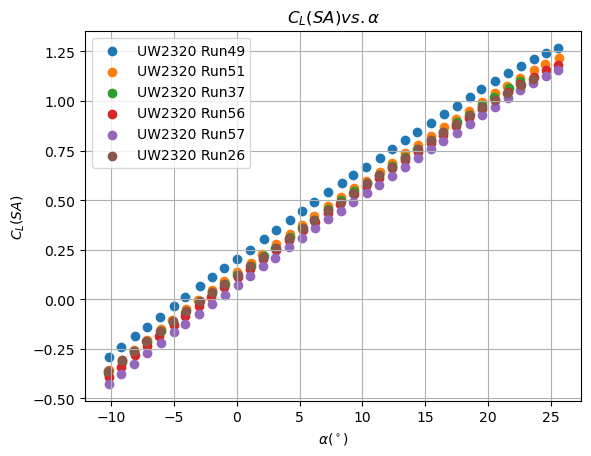

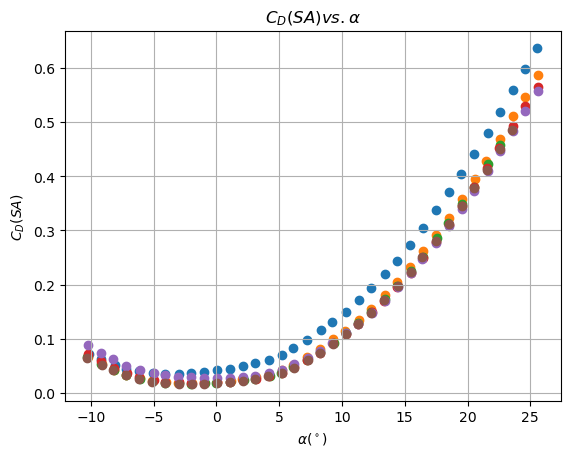

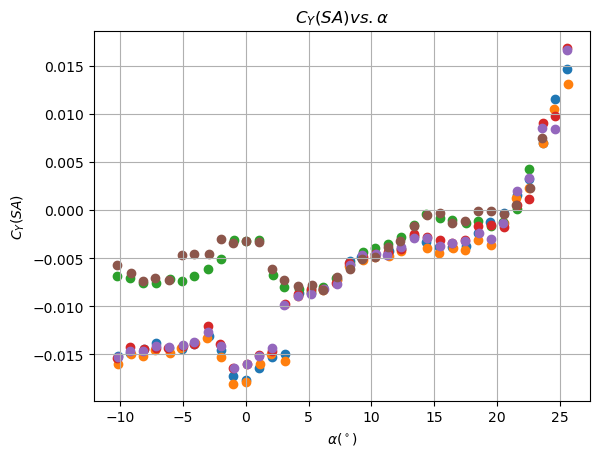

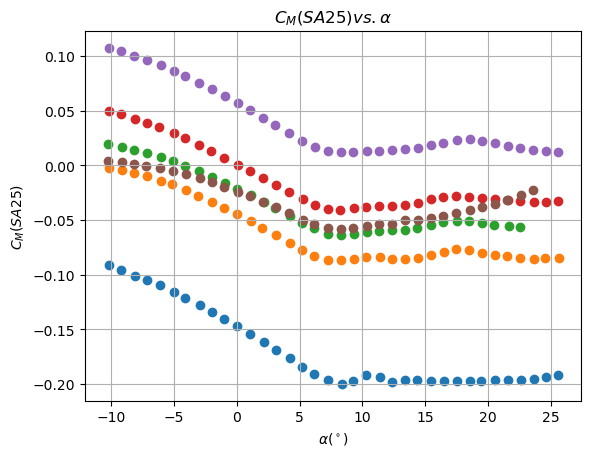

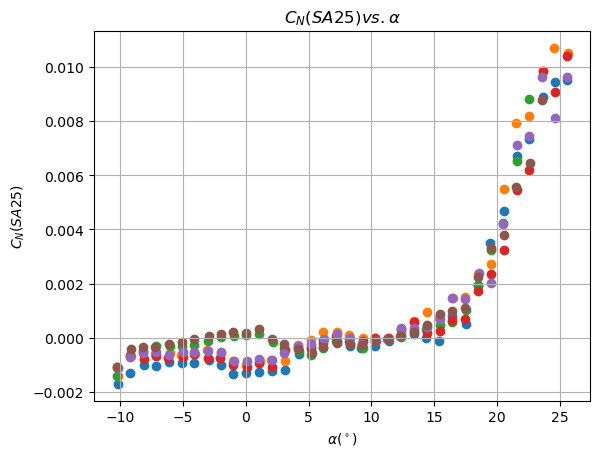

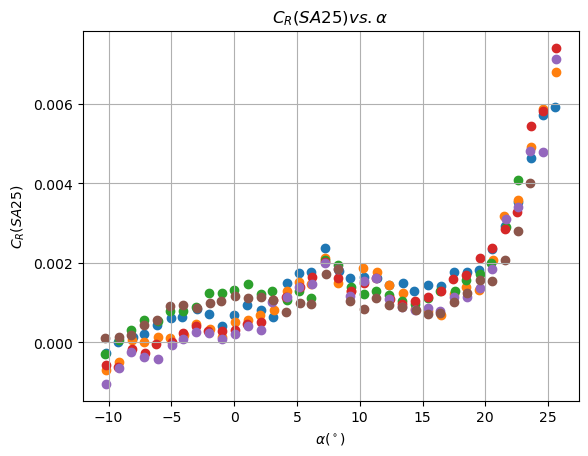

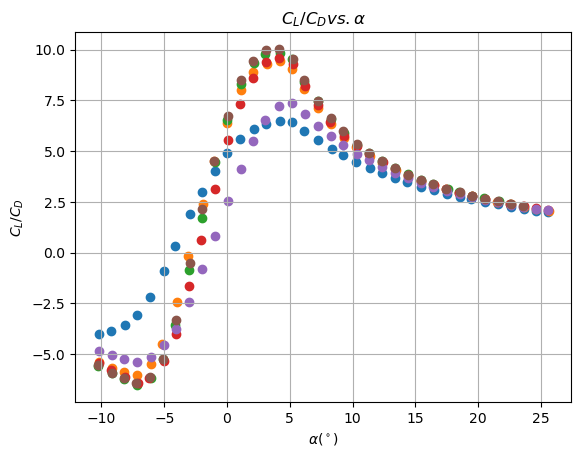

In [16]:
plot_vars = ["CLSA", "CDSA", "CYSA", "CMSA25", "CNSA25", "CRSA25", "LOD"]
DataPlot.plt_data(plot_vars, df_log_sub, df_data_sub, test, runnum)

In [17]:
df_data_sub_interp, df_data_sub_derivative = DataProcess.data_interp_derivative(df_log_sub, df_data_sub, test, runnum)
# DataPlot.plt_data(plot_vars, df_log_sub, df_data_sub_derivative, test, runnum)